<a href="https://colab.research.google.com/github/linkwine/big_data/blob/master/Predict_handwritten_digits_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing MNIST

In [0]:
!pip install python-mnist

  Stored in directory: /root/.cache/pip/wheels/28/29/36/408f83545a511c43d03ef997a1dc99b49ccd5f9f306ed92468
Successfully built python-mnist


## Get Data

In [0]:
from mnist import MNIST

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
mndata = MNIST("./gdrive/Team Drives/Cloud9/mnist")

images, labels = mndata.load_training()

In [0]:
mndata = MNIST("./gdrive/Team Drives/Cloud9/mnist")

images_test, labels_test = mndata.load_testing()

## Explore and Clean Data

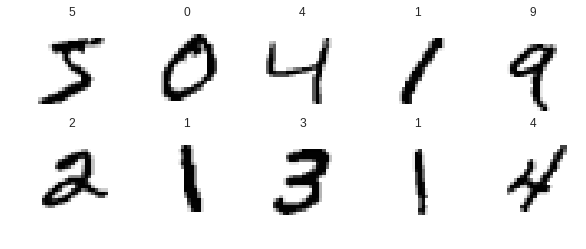

In [0]:
from matplotlib import pyplot as plt
import numpy

fig = plt.figure(figsize=(10,20))
for i in range(10):
    sp = fig.add_subplot(10,5,i+1)
    sp.set_title(labels[i])
    plt.axis('off')
    image = numpy.array(images[i]).reshape(28,28)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

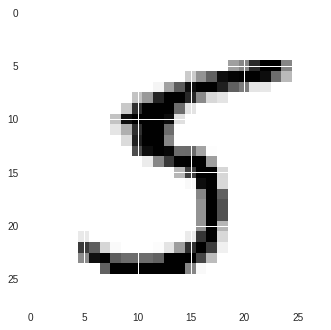

In [0]:
image = numpy.array(images[59997]).reshape(28,28)
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [0]:
## train
images_reshaped =  numpy.reshape(images, (60000,28*28)) 
## test
images_test_reshaped =  numpy.reshape(images_test, (10000,28*28)) 

In [0]:
## train
labels_60000 = labels[0:60000]
labels_data = []
for i in range(60000):
   labels_data.append(labels_60000[i])
labels_data = numpy.asarray(labels_data)
## test
labels_10000 = labels_test[0:10000]
labels_test_data = []
for i in range(10000):
   labels_test_data.append(labels_10000[i])
labels_test_data = numpy.asarray(labels_test_data)

## Modeling

In [0]:
! pip install yellowbrick
! pip install memory_profiler

    100% |████████████████████████████████| 40kB 3.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/f0/ff/63/fdbff3f1e1b76ad4eae491dd5b190902906b093e93eb86dd5a
Successfully built memory-profiler


In [0]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
import memory_profiler
import time
%load_ext memory_profiler

In [0]:
## train
X = images_reshaped
y = labels_data

## test
X_test = images_test_reshaped
y_test = labels_test_data

#### Training & Testing

In [0]:
%%memit ## time model training

## start timer
start_time = time.time()

## model
model = LogisticRegression()
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])
cm.fit(X[0:3000], y[0:3000])

## end timer
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


--- 6.672313213348389 seconds ---
peak memory: 1068.43 MiB, increment: 26.35 MiB


--- 0.26157188415527344 seconds ---
peak memory: 1149.34 MiB, increment: 80.87 MiB


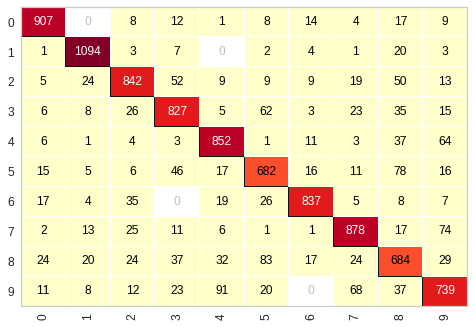

In [0]:
%%memit ## time prediction

## start timer
start_time = time.time()

## score
cm.score(X_test, y_test)

## end timer
print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
## get accuracy
cm.score(X_test, y_test)

0.8342

In [0]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power ma

## Check System Specs

In [0]:
!df -h / | awk '{print $4}'

Avail
27G


In [0]:
!cat /proc/meminfo

MemTotal:       13335276 kB
MemFree:         9802252 kB
MemAvailable:   11721884 kB
Buffers:           83020 kB
Cached:          1539888 kB
SwapCached:            0 kB
Active:          1485368 kB
Inactive:        1809532 kB
Active(anon):    1191660 kB
Inactive(anon):      340 kB
Active(file):     293708 kB
Inactive(file):  1809192 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               344 kB
Writeback:            20 kB
AnonPages:       1672228 kB
Mapped:           182796 kB
Shmem:               868 kB
Slab:             145252 kB
SReclaimable:     115756 kB
SUnreclaim:        29496 kB
KernelStack:        4512 kB
PageTables:         8868 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667636 kB
Committed_AS:    3735040 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  